In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pdb
import pickle
import pandas as pd
from datetime import date, timedelta

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [2]:
def readDataset(fp,groups=[]):
    ds = nc.Dataset(fp)
    groupDs = {}
    if len(groups) > 0:
        for g in groups:
            groupDs[g] = ds.createGroup(g)
    return ds, groupDs

In [3]:
def timeToDate(time):
    dates = []
    start = date(1,1,1)
    for t in time:
        days = int(t)
        delta = timedelta(days)
        offset = start + delta
        dates.append(offset)
    return dates

In [4]:
fp = '/Users/GalinaJonat/OneDrive - Carleton University/niagara/maySims/result_ice_content_peat.nc'
                                                                          
ds, groupDsDict = readDataset(fp,['geotop'])

geotopDs = groupDsDict['geotop']

In [5]:
geotopDs

<class 'netCDF4._netCDF4.Group'>
group /geotop:
    dimensions(sizes): nchars(255), simulation(61), time(48976), soil_depth(5)
    variables(dimensions): float32 soil_depth(soil_depth), float64 Date(time), |S1 simulation(simulation, nchars), |S1 sitename(simulation, nchars), |S1 model(simulation, nchars), float32 ice_content(simulation, time, soil_depth)
    groups: 

In [5]:
fp = '/Users/GalinaJonat/OneDrive - Carleton University/niagara/result_soil_temperatureLdGSel.nc'

ds, groupDsDict = readDataset(fp,['geotop'])

geotopDs = groupDsDict['geotop']

In [7]:
geotopDs

<class 'netCDF4._netCDF4.Group'>
group /geotop:
    dimensions(sizes): nchars(255), simulation(128), time(48976), soil_depth(5)
    variables(dimensions): float32 soil_depth(soil_depth), float64 Date(time), |S1 simulation(simulation, nchars), float32 Tg(simulation, time, soil_depth)
    groups: 

In [6]:
sitenames = list(geotopDs['sitename'][:])
simIDs = list(geotopDs['simulation'][:])
soil_depth = list(geotopDs['soil_depth'][:])
dates = timeToDate(list(geotopDs['Date'][:]))

IndexError: sitename not found in /geotop

In [6]:
siteSimDict = {'simID': simIDs, 'site': sitenames}
siteSimDf = pd.DataFrame(siteSimDict)

In [7]:
s1 = sitenames[0]

In [8]:
s1

'NGO-DD-2035'

In [9]:
s1sims = siteSimDf[siteSimDf['site']==s1]

In [10]:
np.array(s1sims['simID'])

array(['geotop_NGODD20_scaled_merr_1d5ccd0',
       'geotop_NGODD20_scaled_era5_03bb9ff',
       'geotop_NGODD20_scaled_era5_abd16dd',
       'geotop_NGODD20_scaled_merr_ed3cf68'], dtype=object)

In [11]:
simPerSite = {}
for s in sitenames:
    simPerSite[s] = list(siteSimDf[siteSimDf['site']==s]['simID'])

In [12]:
simPerSite["NGO-DD-2035"]

['geotop_NGODD20_scaled_merr_1d5ccd0',
 'geotop_NGODD20_scaled_era5_03bb9ff',
 'geotop_NGODD20_scaled_era5_abd16dd',
 'geotop_NGODD20_scaled_merr_ed3cf68']

In [15]:
def plotOutputPerSite(groupDs, sims,depths):
    if type(sims[0]) == np.ndarray:
        sims = list(sims[:])
    outputPerSim={}
    i=0
    for s in sims:
        outputPerSim[s] = np.array(groupDs['Tg'])[i,:,:]
        i+=1
    if type(sims[0]) == np.ndarray:
        sims = list(sims[:])
    figs = {}
    for s in sims:
        figs[s] = plt.figure()
        plt.title('Simulation: '+s)
        for d in range(len(depths)):
            plt.plot(dates,outputPerSim[s][:,d],label=str(depths[d]/1000)+ " m")
        plt.legend()
        plt.show()

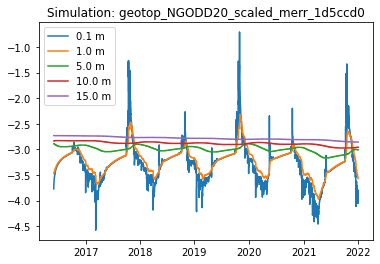

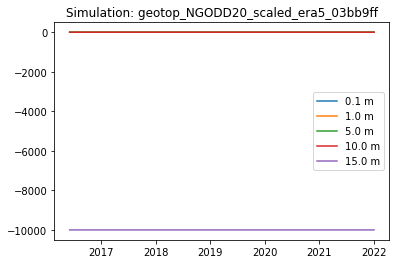

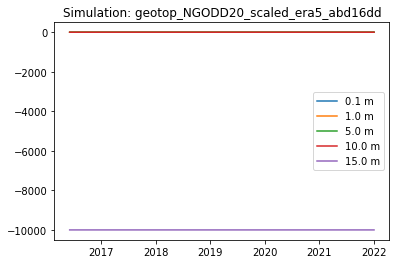

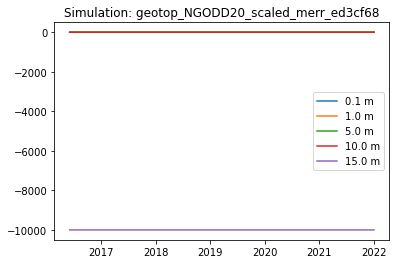

In [16]:
plotOutputPerSim(geotopDs,simPerSite["NGO-DD-2035"],soil_depth)

In [8]:
sim2 = "geotop_NGODD20_scaled_merr_eac78d0"


In [12]:
list(geotopDs['simulation'])

[array('geotop_NGODD10_scaled_merr_7bcbc40', dtype='<U255'),
 array('geotop_NGODD10_scaled_merr_95f5e58', dtype='<U255'),
 array('geotop_ROCKT1B_scaled_era5_c2c1150', dtype='<U255'),
 array('geotop_NGORC14_scaled_merr_ff84352', dtype='<U255'),
 array('geotop_ROCKT3C_scaled_era5_162abe2', dtype='<U255'),
 array('geotop_NGODD10_scaled_era5_27cddcc', dtype='<U255'),
 array('geotop_NGODD20_scaled_era5_27be3cf', dtype='<U255'),
 array('geotop_NGODD20_scaled_era5_5e1a685', dtype='<U255'),
 array('geotop_NGODD20_scaled_merr_5c54cc6', dtype='<U255'),
 array('geotop_NGORC16_scaled_era5_b787667', dtype='<U255'),
 array('geotop_NGODD20_scaled_era5_69f7257', dtype='<U255'),
 array('geotop_NGODD20_scaled_merr_f055fef', dtype='<U255'),
 array('geotop_NGORC17_scaled_era5_7e8dc81', dtype='<U255'),
 array('geotop_NGODD10_scaled_era5_b670b6c', dtype='<U255'),
 array('geotop_NGODD20_scaled_merr_5774ff4', dtype='<U255'),
 array('geotop_NGODD10_scaled_merr_49abcb3', dtype='<U255'),
 array('geotop_NGODD20_s